# A simple example of imaginary lensing estimator modules

In [1]:
# external
import numpy as np
from matplotlib.pyplot import *
# from cmblensplus/wrap/
import basic
import curvedsky as cs
# from cmblensplus/utils/
import plottools as pl
import cmb

First define parameters

In [2]:
Tcmb  = 2.726e6    # CMB temperature
Lmax  = 3000       # maximum multipole of output normalization
rlmin, rlmax = 100, Lmax  # CMB multipole range for reconstruction
L = np.linspace(0,Lmax,Lmax+1)
Lfac = (L*(L+1.))**2/(2*np.pi)

Load arrays of CMB unlensed and lensed Cls. Unlensed Cls are not used for now. The Cls should not be multiplied by any factors and should not have units.  

In [3]:
# ucl is an array of shape [0:5,0:rlmax+1] and ucl[0,:] = TT, ucl[1,:] = EE, ucl[2,:] = TE, lcl[3,:] = phiphi, lcl[4,:] = Tphi
ucl = cmb.read_camb_cls('../data/unlensedcls.dat',ftype='scal',output='array')[:,:rlmax+1] # TT, EE, TE, pp, Tp
# lcl is an array of shape [0:4,0:rlmax+1] and lcl[0,:] = TT, lcl[1,:] = EE, lcl[2,:] = BB, and lcl[3,:] = TE
lcl = cmb.read_camb_cls('../data/lensedcls.dat',ftype='lens',output='array')[:,:rlmax+1] # TT, EE, BB, TE

Define observed CMB cls. Here, no CMB noise.

In [4]:
nl  = np.zeros((4,rlmax+1))
ac2rad = np.pi/10800.
sig = 70.
nl[0,:] = (sig*ac2rad/Tcmb)**2*np.exp(L*(L+1)*(1.*ac2rad)**2/8./np.log(2.))
nl[1,:] = 2*nl[0,:]
nl[2,:] = 2*nl[0,:]
lcl[2,:] *= .5
ocl = lcl + nl

### Compute normalization

In [5]:
Ag, Ac = {}, {}
Ag['TE'], Ac['TE'] = cs.norm_imag.qte('lens',Lmax,rlmin,rlmax,lcl[3,:],ocl[0,:],ocl[1,:])
Ag['EE'], Ac['EE'] = cs.norm_imag.qee('lens',Lmax,rlmin,rlmax,lcl[1,:],ocl[1,:])
Ag['TB'], Ac['TB'] = cs.norm_imag.qtb('lens',Lmax,rlmin,rlmax,lcl[3,:],ocl[0,:],ocl[2,:])
Ag['EB'], Ac['EB'] = cs.norm_imag.qeb('lens',Lmax,rlmin,rlmax,lcl[1,:],ocl[1,:],ocl[2,:])
Ag['BB'], Ac['BB'] = cs.norm_imag.qbb('lens',Lmax,rlmin,rlmax,lcl[1,:],ocl[2,:])

The results of normalization calculation are as follows for gradient adn curl modes

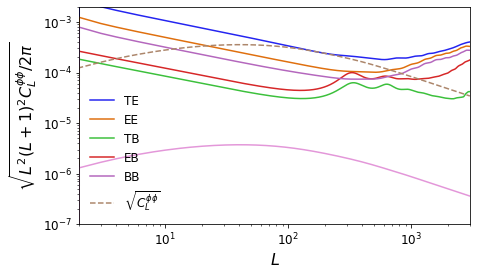

In [6]:
# plot normalization (gradient)
pl.plot_1dstyle(fsize=[7,4],xmin=2,xmax=Lmax,xlog=True,ymin=1e-7,ymax=2e-3,ylog=True,ylab=r'$\sqrt{L^2(L+1)^2C^{\phi\phi}_L/2\pi}$')
for qi, q in enumerate(['TE','EE','TB','EB','BB']):
#for qi, q in enumerate(['TB','EB','BB','eb','tb','bb']):
    plot(L,np.sqrt(Lfac*Ag[q]/(2*L+1)),label=q)
plot(L,np.sqrt(Lfac*ucl[3]),ls='--',label=r'$\sqrt{C_L^{\phi\phi}}$')
plot(L,np.sqrt(Lfac*ucl[3])*np.pi/180.*0.6)
legend()

In [7]:
corr = 0.6
Nl = 1./(1./Ag['EB']+1./Ag['TB']+1./Ag['BB'])
SN = (2*L+1.)*ucl[3]/Nl
sn = np.pi/180. * corr * np.sqrt( np.sum(SN[2:]) )
print(0.05*sn)

0.10419566824080616


/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


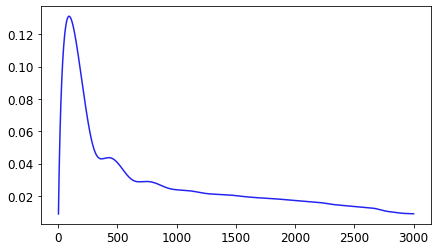

In [8]:
plot(SN**0.5*np.pi/180. * corr)

In [9]:
SN = (2*L+1.)*lcl[1,:]**2/(ocl[1,:]*ocl[2,:])
sn = np.pi/180. * 2. * np.sqrt( np.sum(SN[rlmin+1:]) )
print(0.05*sn)

0.6786961922066062


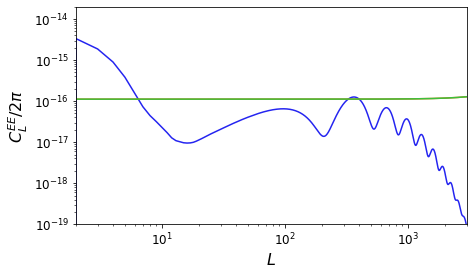

In [10]:
pl.plot_1dstyle(fsize=[7,4],xmin=2,xmax=Lmax,xlog=True,ymin=1e-19,ymax=2e-14,ylog=True,ylab=r'$C^{EE}_L/2\pi$')
plot(lcl[1,:])
plot(nl[1,:])
plot(ocl[2,:])

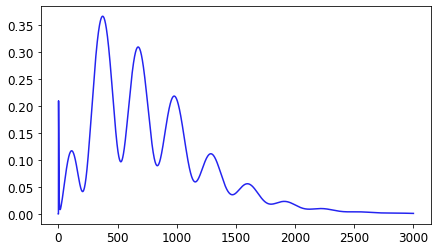

In [11]:
plot(SN**0.5*np.pi/180.)

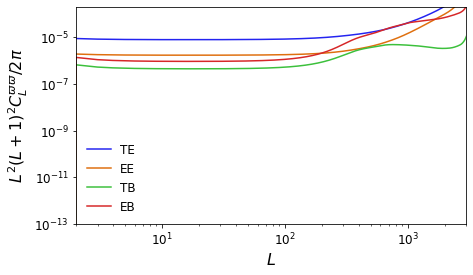

In [12]:
# plot normalization (curl)
pl.plot_1dstyle(fsize=[7,4],xmin=2,xmax=Lmax,xlog=True,ymin=1e-13,ymax=2e-4,ylog=True,ylab=r'$L^2(L+1)^2C^{\varpi\varpi}_L/2\pi$')
for qi, q in enumerate(['TE','EE','TB','EB']):
    plot(L,Lfac*Ac[q],label=q)
legend()

In [13]:
At = {}
At['TE'] = cs.norm_imag.qte('amp',Lmax,rlmin,rlmax,lcl[3,:],ocl[0,:],ocl[1,:])[0]
At['EE'] = cs.norm_imag.qee('amp',Lmax,rlmin,rlmax,lcl[1,:],ocl[1,:])[0]
At['TB'] = cs.norm_imag.qtb('amp',Lmax,rlmin,rlmax,lcl[3,:],ocl[0,:],ocl[2,:])[0]
At['EB'] = cs.norm_imag.qeb('amp',Lmax,rlmin,rlmax,lcl[1,:],ocl[1,:],ocl[2,:])[0]
At['BB'] = cs.norm_imag.qbb('amp',Lmax,rlmin,rlmax,lcl[1,:],ocl[2,:])[0]

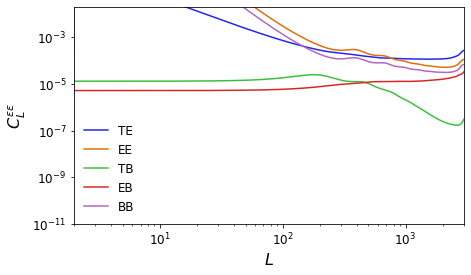

In [14]:
pl.plot_1dstyle(fsize=[7,4],xmin=2,xmax=Lmax,xlog=True,ymin=1e-11,ymax=2e-2,ylog=True,ylab=r'$C^{\epsilon\epsilon}_L$')
for qi, q in enumerate(['TE','EE','TB','EB','BB']):
    plot(L,At[q],label=q)
legend()